# Logistic Regression

Logistic regression is a classic binary classification method that models the probability of an input belonging to the positive class by passing a linear combination through a sigmoid:

$$
h_{\mathbf{w},b}(\mathbf{x}) = \sigma\bigl(\mathbf{w}^\top \mathbf{x} + b\bigr),
\quad
\sigma(z) = \frac{1}{1 + e^{-z}}.
$$

## Prediction Step

1. Compute the linear score (logit):
   $$
   z = \mathbf{w}^\top \mathbf{x} + b.
   $$
2. Convert to probability:
   $$
   \hat y = \sigma(z).
   $$

## Loss Function

We use the binary cross‑entropy to measure how well the predicted probabilities match the true labels \(y^{(i)}\in\{0,1\}\):

$$
J(\mathbf{w}, b)
= -\frac{1}{m}\sum_{i=1}^m \Bigl[
y^{(i)}\ln(\hat y^{(i)}) \;+\;(1 - y^{(i)})\ln\bigl(1 - \hat y^{(i)}\bigr)
\Bigr].
$$

## Gradient Computation

The gradients of \(J\) with respect to the parameters are:

$$
\frac{\partial J}{\partial \mathbf{w}}
= \frac{1}{m}\sum_{i=1}^m \bigl(\hat y^{(i)} - y^{(i)}\bigr)\,\mathbf{x}^{(i)},
\qquad
\frac{\partial J}{\partial b}
= \frac{1}{m}\sum_{i=1}^m \bigl(\hat y^{(i)} - y^{(i)}\bigr).
$$

## Parameter Update (Gradient Descent)

With a learning rate \(\eta\), update parameters as:

$$
\mathbf{w} \leftarrow \mathbf{w} - \eta\,\frac{\partial J}{\partial \mathbf{w}},
\qquad
b \leftarrow b - \eta\,\frac{\partial J}{\partial b}.
$$

By iterating prediction → loss → gradient → update, the model converges to values of \(\mathbf{w}\) and \(b\) that best separate the two classes.


**Visualize the shape of the  Logistic function**

In [1]:
import numpy as np
import plotly.express as px

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-12, 12, 200)
fig = px.line(x=z, y=sigmoid(z),title='Logistic Function',template="plotly_dark")

fig.show()

In [2]:
import pandas as pd
from pathlib import Path
import sys
df = pd.read_csv("../data/breast-cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
fig = px.histogram(
    df,
    x='diagnosis',
    color='diagnosis', 
    template="plotly_dark"
)
fig.show()

In [4]:
fig = px.histogram(
    df,
    x='area_mean',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [5]:
fig = px.histogram(
    df,
    x='radius_mean',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [36]:
fig = px.histogram(
    df,
    x='perimeter_mean',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [37]:
fig = px.histogram(
    df,
    x='smoothness_mean',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.histogram(
    df,
    x='texture_mean',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [38]:
fig = px.scatter(
    df,
    x='symmetry_worst',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [39]:
fig = px.scatter(
    df,
    x='concavity_worst',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.scatter(
    df,
    x='fractal_dimension_worst',
    color='diagnosis',
    template = 'plotly_dark')
fig.show()

<a id="4"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '

# Data Preprocessing

In [3]:
df.drop('id', axis=1, inplace=True)

In [4]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) 

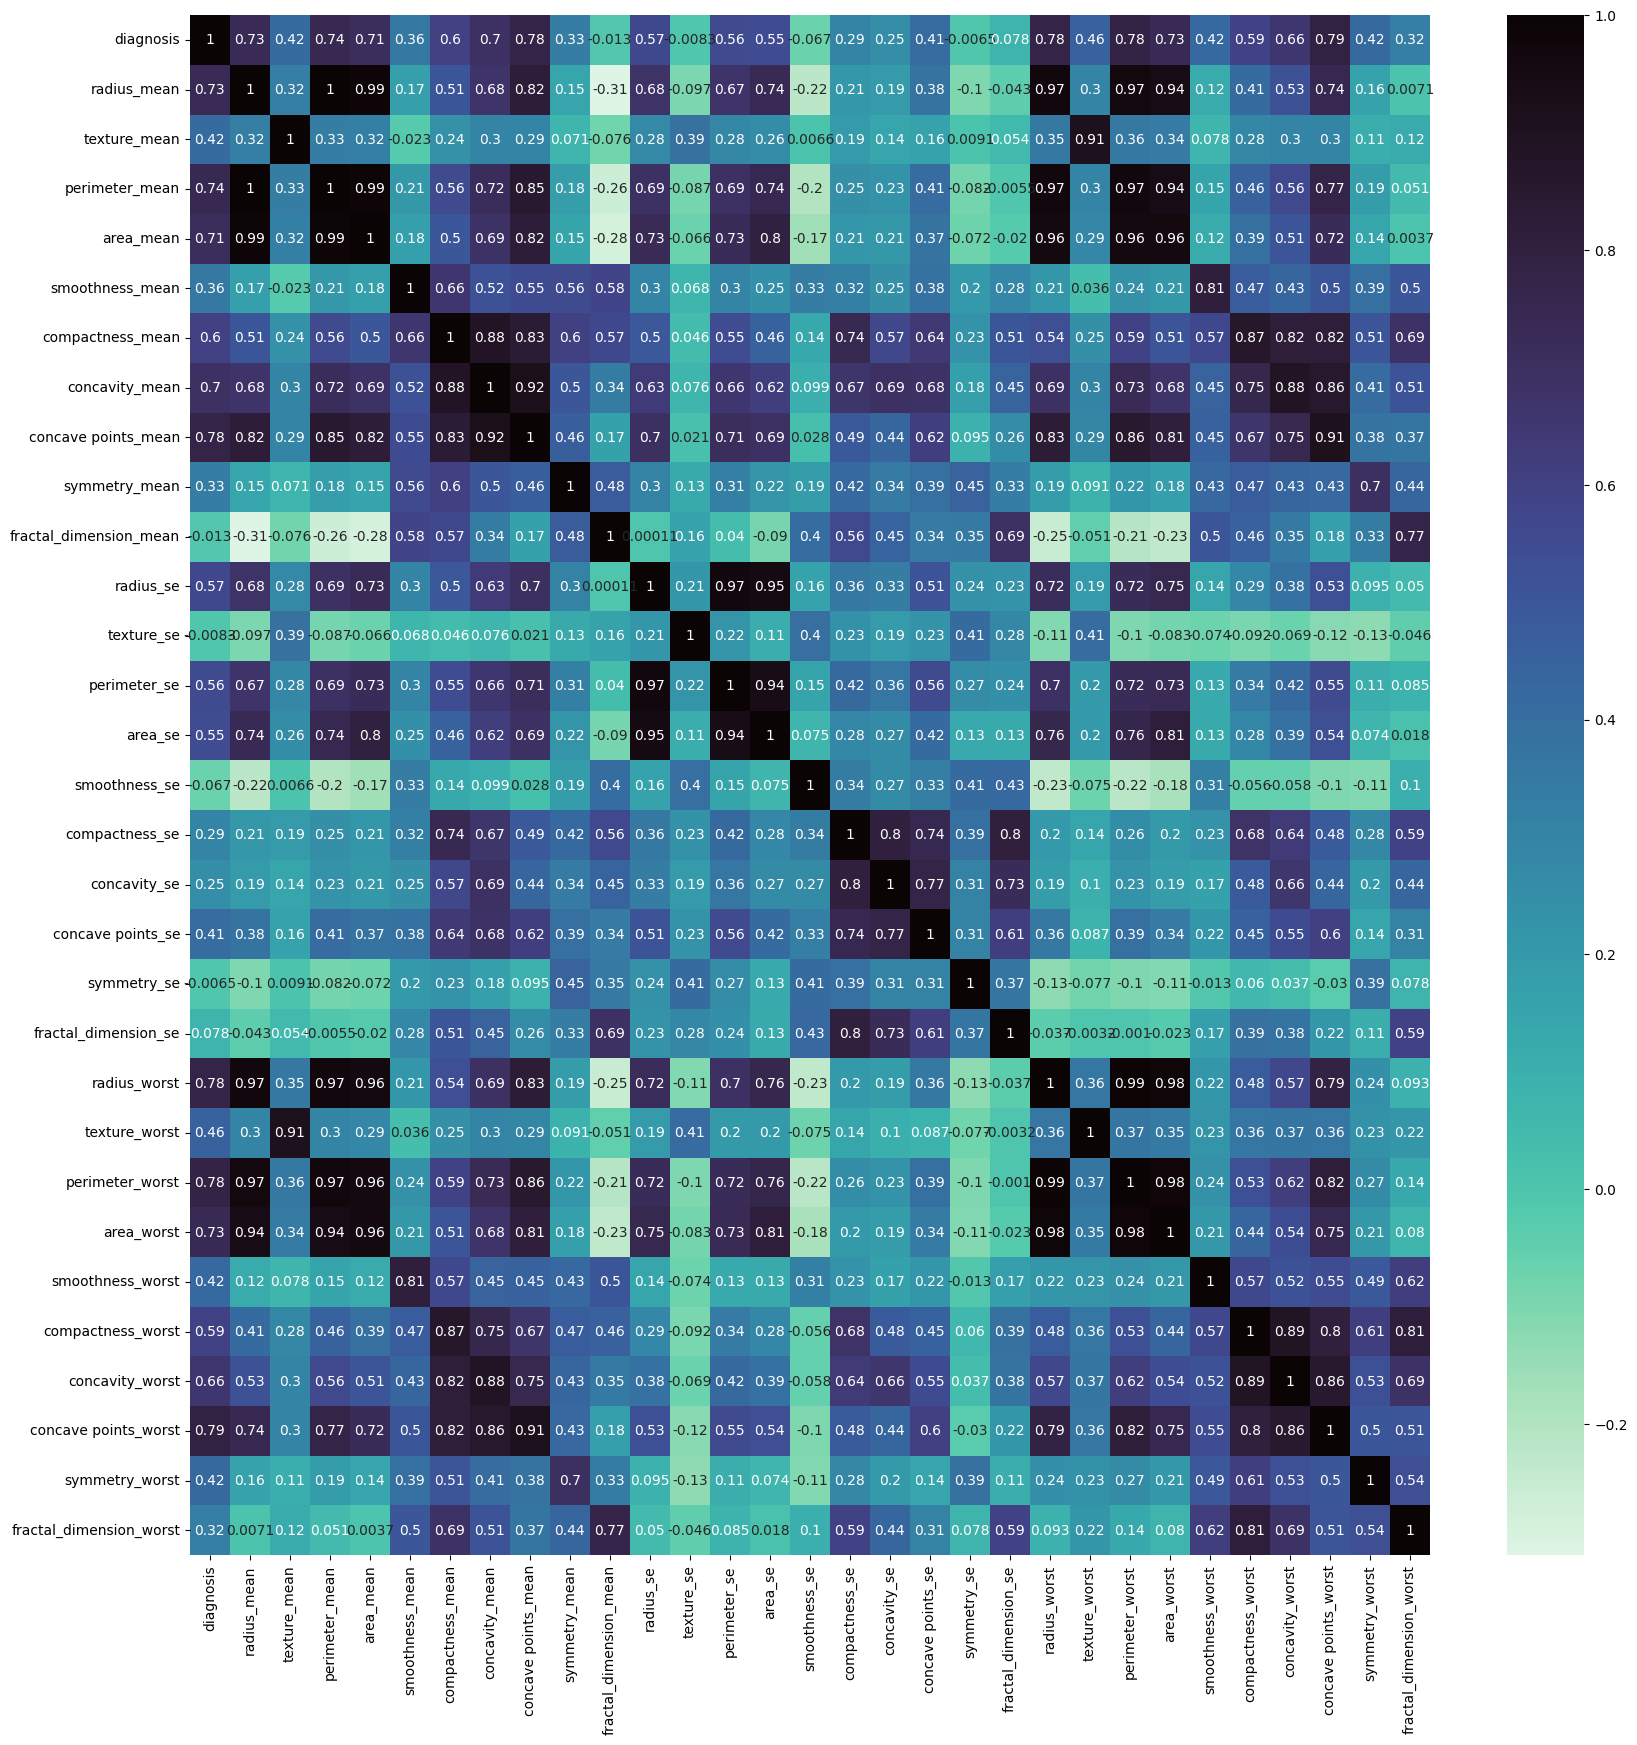

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [6]:
cor_target = abs(corr["diagnosis"])
relevant_features = cor_target[cor_target>0.2]
names = [index for index, value in relevant_features.items()]
names.remove('diagnosis')
X = df[names].values
y = df['diagnosis'].values

In [7]:
from mlfs.preprocessing import  train_test_split, standardize
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train, mean, std = standardize(X_train, return_params=True)
X_test = (X_test - mean) / std

**When working with classification models, it's essential to evaluate how well they perform. Below are four key metrics commonly used to assess classification performance:**

---

## 1. Accuracy

**Formula:**

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

**Description:**
- Accuracy represents the proportion of correctly predicted samples among all predictions.
- It's a widely used and intuitive metric for evaluating model performance.

**Interpretation:**
- Higher accuracy generally indicates better overall performance.
- However, in cases of class imbalance, accuracy can be misleading.

---

## 2. Precision

**Formula:**

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

**Description:**
- Precision shows how many of the positive predictions were actually correct.
- It’s especially important when false positives are costly or problematic.

**Interpretation:**
- A high precision score means the model is rarely wrong when it predicts a positive.

---

## 3. Recall (Sensitivity)

**Formula:**

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

**Description:**
- Recall measures how many actual positive cases were correctly identified.
- It's crucial in situations where missing a positive instance is risky (e.g., in medical diagnoses).

**Interpretation:**
- High recall indicates the model successfully captures most positive cases.

---

## 4. F1-Score

**Formula:**

$$
\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Description:**
- The F1-score is the harmonic mean of precision and recall.
- It provides a single score that balances both false positives and false negatives.

**Interpretation:**
- A high F1-score suggests that the model performs well in both identifying and correctly predicting positive instances.


<a id="4"></a>
<h1 style='background:#00EFFF;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '

# Comparing

In [9]:
import pandas as pd
from mlfs.logistic_regression import LogisticRegression as CustomLogisticRegression
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from mlfs.metrics import (
    accuracy  as custom_accuracy,
    precision as custom_precision,
    recall    as custom_recall,
    f1_score  as custom_f1
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

custom_model = CustomLogisticRegression()
custom_model.fit(X_train, y_train, iterations= 1000,  plot_cost=False)

sk_model = SklearnLogisticRegression(max_iter=1000, solver='lbfgs')
sk_model.fit(X_train, y_train)

y_pred_custom = custom_model.predict(X_test)
y_pred_sk     = sk_model.predict(X_test)

acc_c  = custom_accuracy(y_test, y_pred_custom)
prec_c = custom_precision(y_test, y_pred_custom)
rec_c  = custom_recall(y_test, y_pred_custom)
f1_c   = custom_f1(y_test, y_pred_custom)

acc_s  = accuracy_score(y_test, y_pred_sk)
prec_s = precision_score(y_test, y_pred_sk)
rec_s  = recall_score(y_test, y_pred_sk)
f1_s   = f1_score(y_test, y_pred_sk)

df_results = pd.DataFrame({
    'model':     ['custom',       'sklearn'],
    'Accuracy':  [acc_c,          acc_s],
    'Precision': [prec_c,         prec_s],
    'Recall':    [rec_c,          rec_s],
    'F1-score':  [f1_c,           f1_s]
})

display(df_results)


,model,Accuracy,Precision,Recall,F1-score
0,custom,0.938053,0.871795,0.944444,0.906667
1,sklearn,0.973451,0.923077,1.000000,0.960000


porownanie na moich danych

In [11]:
import time
import numpy as np
import pandas as pd
def benchmark_logistic_custom_data(X, y, n_repeats=3, iterations=1000):
    """
    Compares the fit() and predict() times of a custom logistic regression implementation
    and sklearn's implementation on the given data X and y.

    Parameters:
        X (np.ndarray or pd.DataFrame): Input features.
        y (np.ndarray or pd.Series): Labels (0 or 1).
        n_repeats (int): Number of repetitions for averaging the timing.
        iterations (int): Number of training iterations for the custom model.

    Returns:
        pd.DataFrame: DataFrame containing fit and predict times.
    """
    custom_times = {'fit': [], 'predict': []}
    sklearn_times = {'fit': [], 'predict': []}

    for _ in range(n_repeats):
        # Custom model
        model = CustomLogisticRegression()
        t0 = time.perf_counter()
        model.fit(X, y, iterations=1000)
        t1 = time.perf_counter()
        model.predict(X)  
        t2 = time.perf_counter()
        custom_times['fit'].append(t1 - t0)
        custom_times['predict'].append(t2 - t1)

        # Sklearn model
        model = SklearnLogisticRegression(max_iter=1000, solver='lbfgs')
        t0 = time.perf_counter()
        model.fit(X, y)
        t1 = time.perf_counter()
        model.predict(X)  
        t2 = time.perf_counter()
        sklearn_times['fit'].append(t1 - t0)
        sklearn_times['predict'].append(t2 - t1)

    return pd.DataFrame({
        'custom_fit':      [np.mean(custom_times['fit'])],
        'custom_predict':  [np.mean(custom_times['predict'])],
        'sklearn_fit':     [np.mean(sklearn_times['fit'])],
        'sklearn_predict': [np.mean(sklearn_times['predict'])]
    })


In [12]:
df_times = benchmark_logistic_custom_data(X_train, y_train, n_repeats=5)
display(df_times)

,custom_fit,custom_predict,sklearn_fit,sklearn_predict
0,0.073733,0.000024,0.006257,0.000211


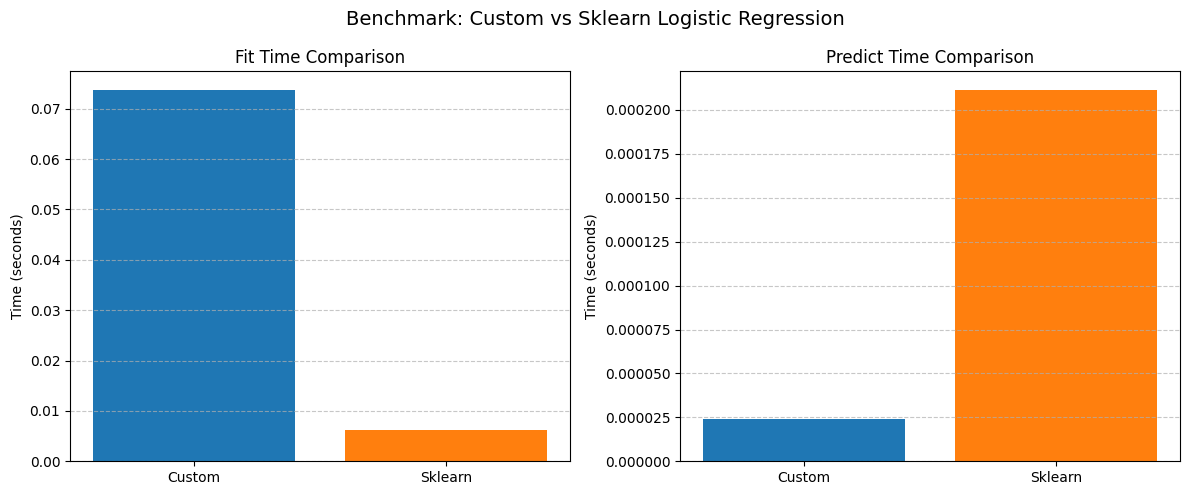

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(['Custom', 'Sklearn'], [df_times['custom_fit'][0], df_times['sklearn_fit'][0]],
            color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Fit Time Comparison')
axes[0].set_ylabel('Time (seconds)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(['Custom', 'Sklearn'], [df_times['custom_predict'][0], df_times['sklearn_predict'][0]],
            color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Predict Time Comparison')
axes[1].set_ylabel('Time (seconds)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Benchmark: Custom vs Sklearn Logistic Regression', fontsize=14)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.datasets import make_classification
from mlfs.logistic_regression import LogisticRegression as CustomLogisticRegression
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

def benchmark_logistic(n_samples_list, n_features=10, n_repeats=3):
    """
    For each number of samples in `n_samples_list`:
      - generates binary classification data,
      - trains CustomLogisticRegression and measures the time for fit() and predict(),
      - trains Sklearn's LogisticRegression and measures the time for fit() and predict().
    Returns a DataFrame with columns:
      ['n_samples', 'custom_fit', 'custom_predict', 'sklearn_fit', 'sklearn_predict']
    """
    results = []
    for n in n_samples_list:
        X, y = make_classification(
            n_samples=n,
            n_features=n_features,
            n_informative=max(2, n_features // 2),
            n_redundant=0,
            random_state=42
        )
        
        custom_times = {'fit': [], 'predict': []}
        for _ in range(n_repeats):
            model = CustomLogisticRegression()
            t0 = time.perf_counter()
            model.fit(X, y, iterations = 1000)
            t1 = time.perf_counter()
            model.predict(X[:10])
            t2 = time.perf_counter()
            custom_times['fit'].append(t1 - t0)
            custom_times['predict'].append(t2 - t1)
        
        sklearn_times = {'fit': [], 'predict': []}
        for _ in range(n_repeats):
            model = SklearnLogisticRegression(max_iter=1000, solver='lbfgs')
            t0 = time.perf_counter()
            model.fit(X, y)
            t1 = time.perf_counter()
            model.predict(X[:10])
            t2 = time.perf_counter()
            sklearn_times['fit'].append(t1 - t0)
            sklearn_times['predict'].append(t2 - t1)
        
        results.append({
            'n_samples':       n,
            'custom_fit':      np.mean(custom_times['fit']),
            'custom_predict':  np.mean(custom_times['predict']),
            'sklearn_fit':     np.mean(sklearn_times['fit']),
            'sklearn_predict': np.mean(sklearn_times['predict']),
        })
        
    return pd.DataFrame(results)


In [15]:
import matplotlib.pyplot as plt

def plot_benchmark(df, sample_col, custom_fit_col, sklearn_fit_col, custom_pred_col, sklearn_pred_col):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(df[sample_col], df[custom_fit_col], label='Custom fit')
    plt.plot(df[sample_col], df[sklearn_fit_col], label='Sklearn fit')
    plt.xlabel('Number of samples')
    plt.ylabel('Fit time (s)')
    plt.title('Fit time comparison')
    plt.legend()
    plt.xscale('log')
    
    plt.subplot(1, 2, 2)
    plt.plot(df[sample_col], df[custom_pred_col], label='Custom predict')
    plt.plot(df[sample_col], df[sklearn_pred_col], label='Sklearn predict')
    plt.xlabel('Number of samples')
    plt.ylabel('Predict time (s)')
    plt.title('Predict time comparison')
    plt.legend()
    plt.xscale('log')
    
    plt.tight_layout()
    plt.show()


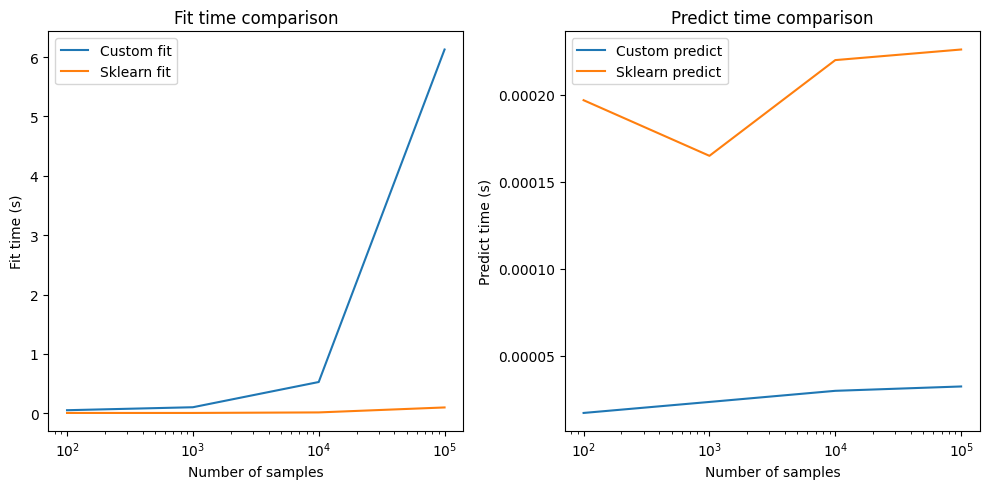

In [16]:
ns = [100, 1_000, 10_000, 100_000]
df_times = benchmark_logistic(ns, n_features=20, n_repeats=5)

plot_benchmark(df_times,
               sample_col='n_samples',
               custom_fit_col='custom_fit',
               sklearn_fit_col='sklearn_fit',
               custom_pred_col='custom_predict',
               sklearn_pred_col='sklearn_predict')

## Benchmark Results: Custom vs Sklearn Logistic Regression

The plots below compare the training and prediction times of a custom implementation of logistic regression with scikit-learn's `LogisticRegression`. The experiment was performed on datasets of increasing size (100, 1,000, 10,000, and 100,000 samples) using 20 features, with each measurement averaged over 5 runs.

### Fit Time Comparison (Left Plot)

- The custom model shows significantly higher training times compared to scikit-learn.
- This is expected due to the use of a plain **batch gradient descent** algorithm in the custom implementation, with a relatively small learning rate (`0.0001`) and potentially a large number of iterations.
- The model does include **early stopping based on gradient norm**, which helps avoid unnecessary iterations, but is still far less efficient than the **LBFGS solver** used by `sklearn`, which benefits from advanced optimization techniques and low-level performance tuning.
- As dataset size increases, the gap between the two implementations becomes larger.

### Predict Time Comparison (Right Plot)

- The custom model has a slightly faster prediction time, but the absolute difference is negligible (on the order of microseconds).
- This is because the custom `predict()` method uses a minimal implementation: just a dot product and a threshold (sigmoid + 0.5), with no input validation or type checks.
- Scikit-learn's model includes additional overhead to ensure robustness and compatibility, which slightly increases prediction time.

### Final Thoughts

- The custom implementation is ideal for **educational purposes** and understanding the mechanics of logistic regression.
- However, for large-scale or production tasks, `scikit-learn` remains the preferred option due to its **optimization, speed, and reliability**.
- Future improvements to the custom model could include adding **regularization**, **adaptive learning rates**, or using **Numba/Cython** to speed up computations.